In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import random
import torch

DATASET_IMAGES_PATH = "/home/idriss/github_repos/Arabic-Handwritten-OCR/Dataset/Total Images"
DATASET_LETTERS_PATH = "/home/idriss/github_repos/Arabic-Handwritten-OCR/Dataset/Total GT"

from model_scripts import BenchmarkCnn2
from custom_dataset import CustomDataset
from create_data_loader import create_data_loader
import torch
import torchvision
from utils import square_crop

# Get train loaders
resize = torchvision.transforms.Resize((64, 64))
custom_dataset = CustomDataset(images_folder=DATASET_IMAGES_PATH,
                               labels_folder=DATASET_LETTERS_PATH,
                               transform=resize)
train_loader, val_loader, test_loader = create_data_loader(custom_dataset)

# Step 1: Define model

# Step 2: Set up your training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_classes = len(custom_dataset.unique_targets)

model = torch.load("../saved_models/benchmark_cnn_2024-02-29_22-23-16.pth")
print(model)

Train set size: 3611
Validation set size: 774
Test set size: 775
Number of batches in train loader: 113
Number of batches in validation loader: 25
Number of batches in test loader: 25
BenchmarkCnn2(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(8, 8), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=4, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=317, bias=True)
    (3): Sigmoid()
  )
)


/tmp/ipykernel_109738/1874683350.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(image).unsqueeze(0).unsqueeze(0)


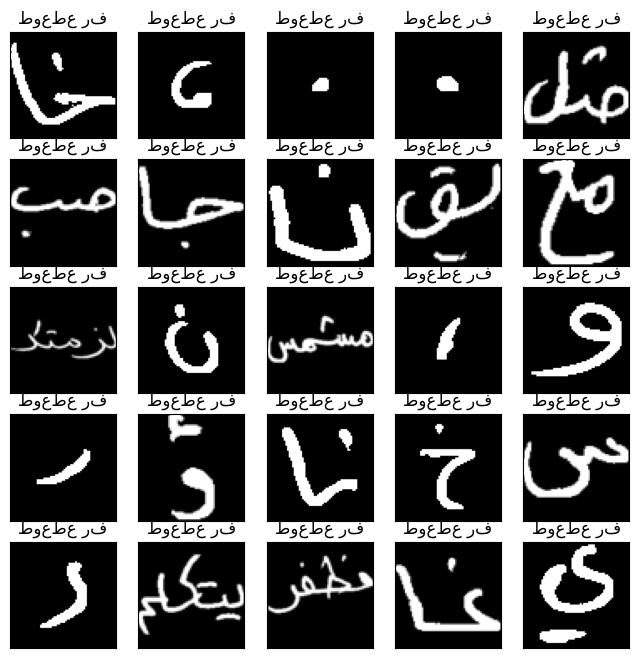

In [28]:
resize = torchvision.transforms.Resize((64, 64))

fig, axs = plt.subplots(5,5, figsize=(8,8))

for i in range(5):
    for j in range(5):
        image_name = random.choice(os.listdir(DATASET_IMAGES_PATH))
        with open(os.path.join(DATASET_LETTERS_PATH, image_name.split(".")[0]+".txt")) as f:
            image_label = f.read() 
        image = Image.open(os.path.join(DATASET_IMAGES_PATH, image_name))
        image = square_crop(np.array(image), resize)
        axs[i,j].imshow(image, cmap="gray")
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])

        x = torch.tensor(image).unsqueeze(0).unsqueeze(0)
        pred_vec = model(x)
        pred = custom_dataset.unique_targets[torch.argmax(pred_vec)]
        axs[i,j].set_title(pred[::-1])